In [4]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import sys
import paths
sys.path.append(paths.scripts_root)
import util

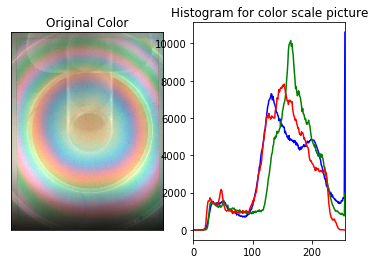

In [6]:
img_bgr  = cv2.imread(paths.projects_root +'/fringe_detection/MRTool_fringe1.bmp',cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1),plt.imshow(img_bgr)
plt.title('Original Color'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)    
plt.title('Histogram for color scale picture')
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img_bgr],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
#plt.subplot(1,3,3),plt.imshow(img_gray,cmap = 'gray')
#plt.title('Original Gray'), plt.xticks([]), plt.yticks([])

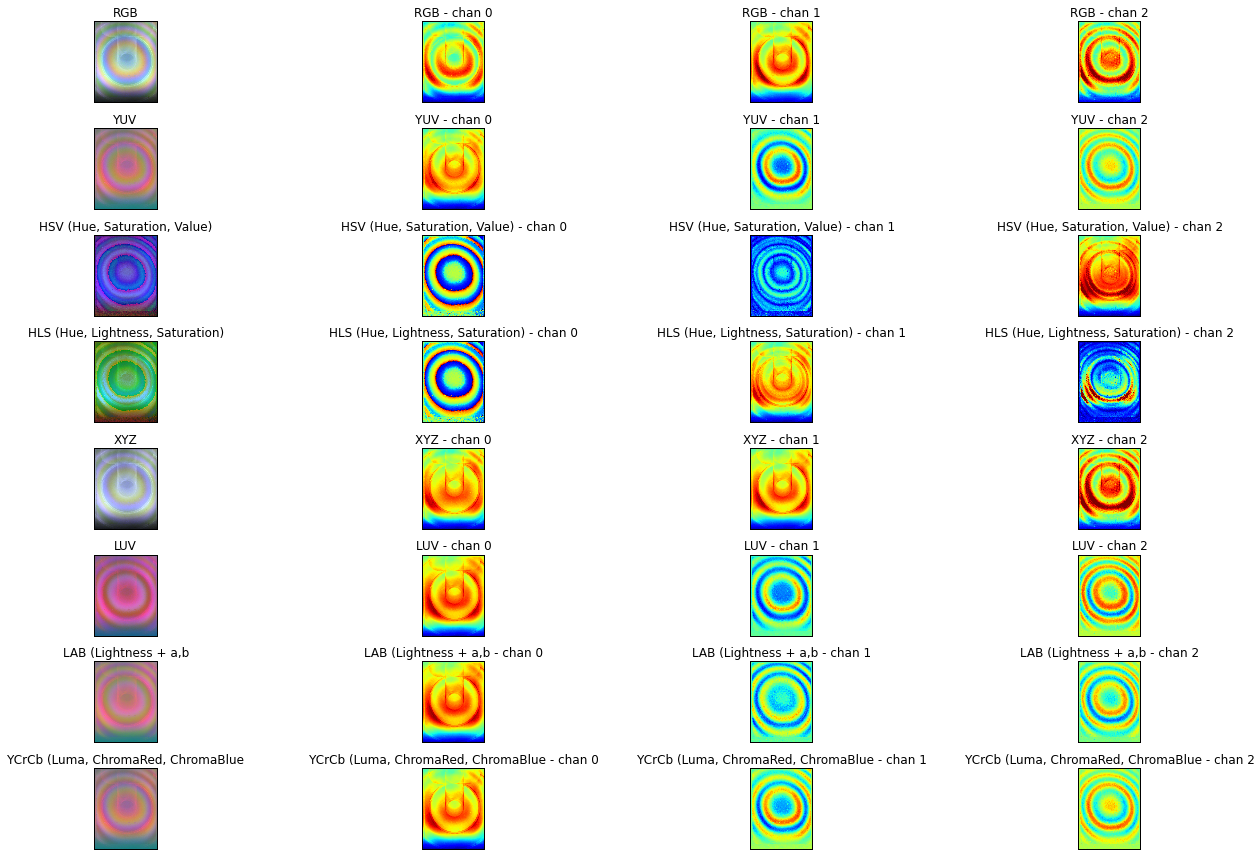

In [4]:
color_conversions = (['RGB',cv2.COLOR_BGR2RGB], ['YUV',cv2.COLOR_BGR2YUV], ['HSV (Hue, Saturation, Value)',cv2.COLOR_BGR2HSV],
                     ['HLS (Hue, Lightness, Saturation)',cv2.COLOR_BGR2HLS],['XYZ',cv2.COLOR_BGR2XYZ],
                     ['LUV',cv2.COLOR_BGR2LUV], ['LAB (Lightness + a,b',cv2.COLOR_BGR2LAB], ['YCrCb (Luma, ChromaRed, ChromaBlue',cv2.COLOR_BGR2YCrCb] )
rows = len(color_conversions)
cols = 4
plt.figure(figsize=(18,12))
for idx, color_conversion in enumerate(color_conversions):
    img = cv2.cvtColor(img_bgr, color_conversion[1])
    plt.subplot(rows,cols, (idx*cols)+1),plt.imshow(img)
    plt.title('%s' % (color_conversion[0])), plt.xticks([]), plt.yticks([])
    color = ('0','1','2')
    for chan_idx, col in enumerate(color):
        chan = cv2.split(img)[chan_idx]
        plt.subplot(rows,cols, (idx*cols)+1+chan_idx+1),plt.imshow(chan)
        plt.title('%s - chan %d' % (color_conversion[0], chan_idx)), plt.xticks([]), plt.yticks([])
plt.tight_layout()        